# Model Selector for GOTO and ASII Model

In [59]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

## Short Term

In [4]:
path_short_res = "../result_tuning/result_short_tuning.csv"

In [14]:
df_short_res = pd.read_csv(path_short_res)

In [15]:
df_short_res

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,short,LSTM,56.828389,0.405917,50,50,rmsprop,32
1,ASII,short,GRU,46.530159,0.332358,50,50,rmsprop,32
2,ASII,short,RNN,68.823599,0.439425,50,50,rmsprop,32
3,ASII,short,LSTM,54.557991,0.389700,50,50,adam,32
4,ASII,short,GRU,47.977016,0.342693,50,50,adam,32
...,...,...,...,...,...,...,...,...,...
139,GOTO,short,GRU,2.329020,0.776340,100,100,adam,32
140,GOTO,short,RNN,2.235370,0.730179,100,100,adam,32
141,GOTO,short,LSTM,2.354908,0.784969,100,100,sgd,32
142,GOTO,short,GRU,2.267226,0.755742,100,100,sgd,32


### ASII

In [18]:
data_asii = df_short_res[df_short_res["stock"] == "ASII"]

In [20]:
data_asii.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,short,LSTM,56.828389,0.405917,50,50,rmsprop,32
1,ASII,short,GRU,46.530159,0.332358,50,50,rmsprop,32
2,ASII,short,RNN,68.823599,0.439425,50,50,rmsprop,32
3,ASII,short,LSTM,54.557991,0.389700,50,50,adam,32
4,ASII,short,GRU,47.977016,0.342693,50,50,adam,32


#### LSTM

In [50]:
data_asii_lstm = data_asii[data_asii["algorithm"] == "LSTM"]
data_asii_lstm.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,short,LSTM,56.828389,0.405917,50,50,rmsprop,32
3,ASII,short,LSTM,54.557991,0.389700,50,50,adam,32
6,ASII,short,LSTM,58.053621,0.414669,50,50,sgd,32
9,ASII,short,LSTM,53.183868,0.379885,50,50,rmsprop,32
12,ASII,short,LSTM,55.015273,0.392966,50,50,adam,32


In [27]:
#see min value
minimum_lstm_asii = data_asii_lstm["rmse_norm"].min()
minimum_lstm_asii


0.3633567597515912

In [29]:
minimum_config_lstm_asii = data_asii_lstm[data_asii_lstm["rmse_norm"] == minimum_lstm_asii]
minimum_config_lstm_asii

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
54,ASII,short,LSTM,50.869946,0.363357,100,100,rmsprop,32


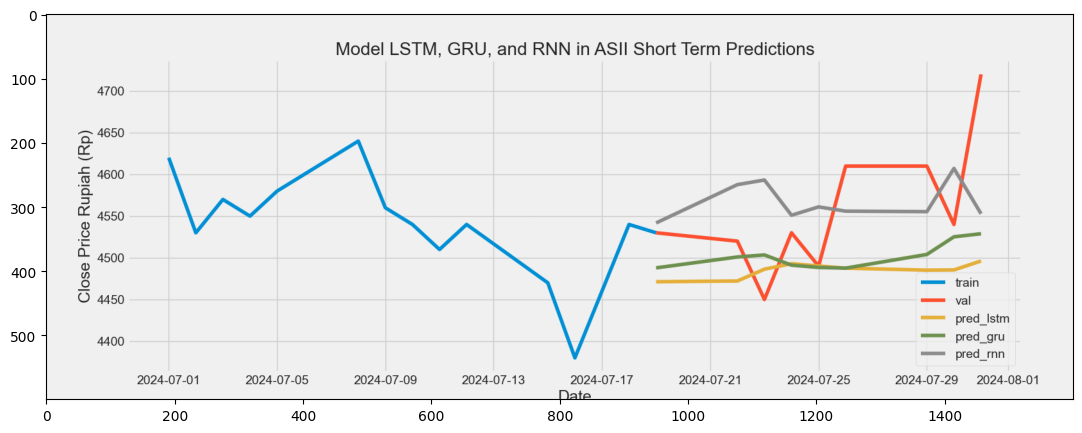

In [40]:
result = plt.imread('../result tuning/ASIIshort_rmsprop_32_100_100.png') 
plt.figure(figsize=((20,5)))
plt.imshow(result) 
plt.show()


#### GRU

In [49]:
data_asii_gru = data_asii[data_asii["algorithm"] == "GRU"]
data_asii_gru.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
1,ASII,short,GRU,46.530159,0.332358,50,50,rmsprop,32
4,ASII,short,GRU,47.977016,0.342693,50,50,adam,32
7,ASII,short,GRU,53.958830,0.385420,50,50,sgd,32
10,ASII,short,GRU,53.168518,0.379775,50,50,rmsprop,32
13,ASII,short,GRU,53.400250,0.381430,50,50,adam,32


In [44]:
#see min value
minimum_gru_asii = data_asii_gru["rmse_norm"].min()
minimum_gru_asii

0.29249745438936

In [45]:
minimum_config_gru_asii = data_asii_lstm[data_asii_lstm["rmse_norm"] == minimum_gru_asii]
minimum_config_gru_asii

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
58,ASII,short,GRU,40.949644,0.292497,100,100,adam,32


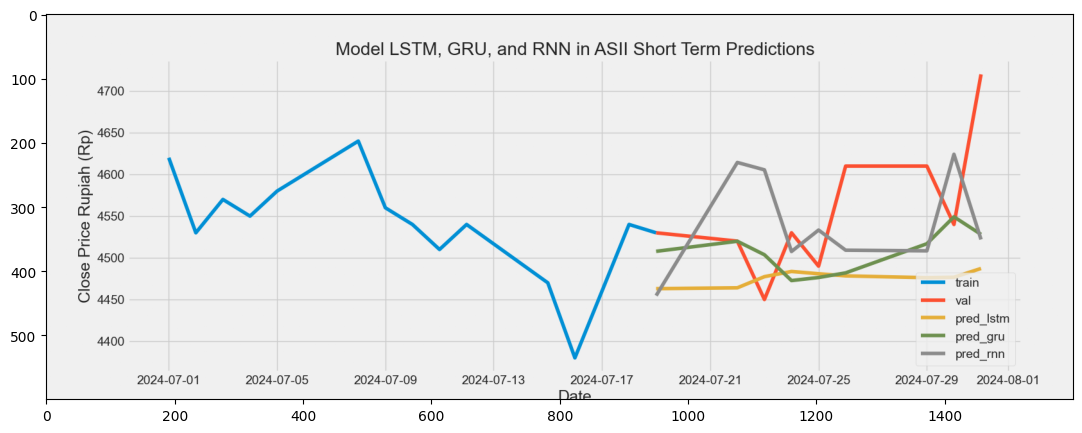

In [46]:
result = plt.imread('../result tuning/ASIIshort_adam_32_100_100.png') 
plt.figure(figsize=((20,5)))
plt.imshow(result) 
plt.show()


#### RNN

In [48]:
data_asii_rnn = data_asii[data_asii["algorithm"] == "RNN"]
data_asii_rnn.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
2,ASII,short,RNN,68.823599,0.439425,50,50,rmsprop,32
5,ASII,short,RNN,72.286487,0.512603,50,50,adam,32
8,ASII,short,RNN,53.650868,0.383220,50,50,sgd,32
11,ASII,short,RNN,90.167723,0.378059,50,50,rmsprop,32
14,ASII,short,RNN,85.324797,0.438696,50,50,adam,32


In [51]:
#see min value
minimum_rnn_asii = data_asii_rnn["rmse_norm"].min()
minimum_rnn_asii

0.3228408459686218

In [53]:
minimum_config_rnn_asii = data_asii_rnn[data_asii_rnn["rmse_norm"] == minimum_rnn_asii]
minimum_config_rnn_asii

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
44,ASII,short,RNN,45.197718,0.322841,100,50,sgd,32


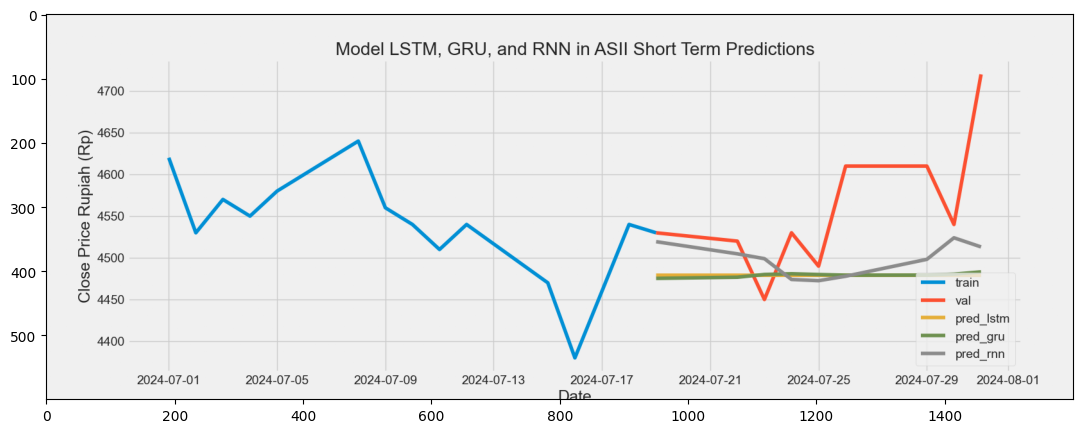

In [54]:
result = plt.imread('../result tuning/ASIIshort_sgd_32_100_50.png') 
plt.figure(figsize=((20,5)))
plt.imshow(result) 
plt.show()


#### Best Model Configuration Each Model Tuning

In [58]:
data_tuning_short_asii = pd.concat([minimum_config_rnn_asii, minimum_config_gru_asii, minimum_config_lstm_asii])

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
44,ASII,short,RNN,45.197718,0.322841,100,50,sgd,32
58,ASII,short,GRU,40.949644,0.292497,100,100,adam,32
54,ASII,short,LSTM,50.869946,0.363357,100,100,rmsprop,32


Best Model is In GRU Algorithm with minimum RMSE Norm Result (0.29) with 100 Epoch, 100 Unit, Adam Optimizer, and 32 BatchSize

### GOTO

In [85]:
data_goto = df_short_res[df_short_res["stock"] == "GOTO"]
data_goto.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
72,GOTO,short,LSTM,2.356899,0.785529,50,50,rmsprop,32
73,GOTO,short,GRU,2.378767,0.782191,50,50,rmsprop,32
74,GOTO,short,RNN,2.410666,0.675220,50,50,rmsprop,32
75,GOTO,short,LSTM,2.355809,0.785270,50,50,adam,32
76,GOTO,short,GRU,2.366497,0.784444,50,50,adam,32


#### LSTM

In [86]:
data_goto_lstm = data_goto[data_goto["algorithm"] == "LSTM"]
data_goto_lstm.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
72,GOTO,short,LSTM,2.356899,0.785529,50,50,rmsprop,32
75,GOTO,short,LSTM,2.355809,0.785270,50,50,adam,32
78,GOTO,short,LSTM,2.360127,0.784956,50,50,sgd,32
81,GOTO,short,LSTM,2.350398,0.783466,50,50,rmsprop,32
84,GOTO,short,LSTM,2.352250,0.784083,50,50,adam,32


In [87]:
#see min value
minimum_lstm_goto = data_goto_lstm["rmse_norm"].min()
minimum_lstm_goto


0.7821206035127931

In [88]:
minimum_config_lstm_goto = data_goto_lstm[data_goto_lstm["rmse_norm"] == minimum_lstm_goto]
minimum_config_lstm_goto

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
108,GOTO,short,LSTM,2.371045,0.782121,100,50,rmsprop,32


#### GRU

In [89]:
data_goto_gru = data_goto[data_goto["algorithm"] == "GRU"]
data_goto_gru.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
73,GOTO,short,GRU,2.378767,0.782191,50,50,rmsprop,32
76,GOTO,short,GRU,2.366497,0.784444,50,50,adam,32
79,GOTO,short,GRU,2.287080,0.762360,50,50,sgd,32
82,GOTO,short,GRU,2.303759,0.767920,50,50,rmsprop,32
85,GOTO,short,GRU,2.319818,0.773273,50,50,adam,32


In [91]:
#see min value
minimum_gru_goto = data_goto_gru["rmse_norm"].min()
minimum_gru_goto


0.7557418875666743

In [92]:
minimum_config_gru_goto = data_goto_gru[data_goto_gru["rmse_norm"] == minimum_gru_goto]
minimum_config_gru_goto

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
142,GOTO,short,GRU,2.267226,0.755742,100,100,sgd,32


#### RNN

In [93]:
data_goto_rnn = data_goto[data_goto["algorithm"] == "RNN"]
data_goto_rnn.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
74,GOTO,short,RNN,2.410666,0.675220,50,50,rmsprop,32
77,GOTO,short,RNN,2.426298,0.562037,50,50,adam,32
80,GOTO,short,RNN,2.514813,0.710704,50,50,sgd,32
83,GOTO,short,RNN,1.722381,0.574127,50,50,rmsprop,32
86,GOTO,short,RNN,2.334793,0.708530,50,50,adam,32


In [94]:
#see min value
minimum_rnn_goto = data_goto_rnn["rmse_norm"].min()
minimum_rnn_goto


0.5587877606571264

In [95]:
minimum_config_rnn_goto = data_goto_rnn[data_goto_rnn["rmse_norm"] == minimum_rnn_goto]
minimum_config_rnn_goto

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
110,GOTO,short,RNN,1.943884,0.558788,100,50,rmsprop,32


#### Best Model Configuration Each Algorithm

In [97]:
data_tuning_short_goto = pd.concat([minimum_config_rnn_goto, minimum_config_gru_goto, minimum_config_lstm_goto])
data_tuning_short_goto

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
110,GOTO,short,RNN,1.943884,0.558788,100,50,rmsprop,32
142,GOTO,short,GRU,2.267226,0.755742,100,100,sgd,32
108,GOTO,short,LSTM,2.371045,0.782121,100,50,rmsprop,32


Best Model for GOTO stock code is In RNN Algorithm with minimum RMSE Norm Result (0.55) with 100 Epoch, 50 Unit, RMSProp Optimizer, and 32 Batch Size

## Long Term

In [100]:
path_long_res = "../result_tuning2/result_long_tuning.csv"
df_long_res = pd.read_csv(path_long_res)
df_long_res

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,long,LSTM,205.338731,0.080004,50,50,rmsprop,32
1,ASII,long,GRU,161.816224,0.063833,50,50,rmsprop,32
2,ASII,long,RNN,142.279251,0.053062,50,50,rmsprop,32
3,ASII,long,LSTM,206.692710,0.077749,50,50,adam,32
4,ASII,long,GRU,89.281716,0.035220,50,50,adam,32
5,ASII,long,RNN,217.973856,0.081249,50,50,adam,32
6,ASII,long,LSTM,309.376535,0.122042,50,50,sgd,32
7,ASII,long,GRU,178.810872,0.070537,50,50,sgd,32
8,ASII,long,RNN,319.867909,0.119957,50,50,sgd,32
9,ASII,long,LSTM,255.128888,0.100643,50,50,rmsprop,32


### ASII

In [104]:
data_asii = df_long_res[df_long_res["stock"] == "ASII"]
data_asii.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,long,LSTM,205.338731,0.080004,50,50,rmsprop,32
1,ASII,long,GRU,161.816224,0.063833,50,50,rmsprop,32
2,ASII,long,RNN,142.279251,0.053062,50,50,rmsprop,32
3,ASII,long,LSTM,206.692710,0.077749,50,50,adam,32
4,ASII,long,GRU,89.281716,0.035220,50,50,adam,32


#### LSTM

In [108]:
data_asii_lstm = data_asii[data_asii["algorithm"] == "LSTM"]
data_asii_lstm.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,ASII,long,LSTM,205.338731,0.080004,50,50,rmsprop,32
3,ASII,long,LSTM,206.692710,0.077749,50,50,adam,32
6,ASII,long,LSTM,309.376535,0.122042,50,50,sgd,32
9,ASII,long,LSTM,255.128888,0.100643,50,50,rmsprop,32
12,ASII,long,LSTM,193.703926,0.076412,50,50,adam,32


In [110]:
#see min value
minimum_lstm_asii = data_asii_lstm["rmse_norm"].min()
minimum_lstm_asii


0.043794056287742

In [113]:
minimum_config_lstm_asii = data_asii_lstm[data_asii_lstm["rmse_norm"] == minimum_lstm_asii]
minimum_config_lstm_asii

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
39,ASII,long,LSTM,112.966875,0.043794,100,50,adam,32


#### GRU

In [114]:
data_asii_gru = data_asii[data_asii["algorithm"] == "GRU"]
data_asii_gru.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
1,ASII,long,GRU,161.816224,0.063833,50,50,rmsprop,32
4,ASII,long,GRU,89.281716,0.035220,50,50,adam,32
7,ASII,long,GRU,178.810872,0.070537,50,50,sgd,32
10,ASII,long,GRU,154.770312,0.059855,50,50,rmsprop,32
13,ASII,long,GRU,125.854418,0.049647,50,50,adam,32


In [115]:
#see min value
minimum_gru_asii = data_asii_gru["rmse_norm"].min()
minimum_gru_asii


0.0279102823890496

In [116]:
minimum_config_gru_asii = data_asii_gru[data_asii_gru["rmse_norm"] == minimum_gru_asii]
minimum_config_gru_asii

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
40,ASII,long,GRU,71.03479,0.02791,100,50,adam,32


#### RNN

In [107]:
data_asii_rnn = data_asii[data_asii["algorithm"] == "RNN"]
data_asii_rnn.head()

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
2,ASII,long,RNN,142.279251,0.053062,50,50,rmsprop,32
5,ASII,long,RNN,217.973856,0.081249,50,50,adam,32
8,ASII,long,RNN,319.867909,0.119957,50,50,sgd,32
11,ASII,long,RNN,234.196774,0.087103,50,50,rmsprop,32
14,ASII,long,RNN,162.978189,0.063311,50,50,adam,32


In [117]:
#see min value
minimum_rnn_asii = data_asii_rnn["rmse_norm"].min()
minimum_rnn_asii


0.033472538070663

In [118]:
minimum_config_rnn_asii = data_asii_rnn[data_asii_rnn["rmse_norm"] == minimum_rnn_asii]
minimum_config_rnn_asii

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
47,ASII,long,RNN,86.452914,0.033473,100,50,rmsprop,32


#### Best Model Configuration

In [120]:
data_tuning_long_asii = pd.concat([minimum_config_rnn_asii, minimum_config_gru_asii, minimum_config_lstm_asii])
data_tuning_long_asii

,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
47,ASII,long,RNN,86.452914,0.033473,100,50,rmsprop,32
40,ASII,long,GRU,71.034790,0.027910,100,50,adam,32
39,ASII,long,LSTM,112.966875,0.043794,100,50,adam,32


Best Model is GRU Algorithm with minimum RMSE Norm Result (0.02) with 100 Epoch, 50 Unit, Adam Optimizer, and 32 Batch Size

### GOTO

## Benchmark Analysis

In [61]:
benchmark = pd.read_csv("../result/goto-asii-long-short-baseline.csv")
benchmark

,Unnamed: 0,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,0,ASII,short,LSTM,55.009487,0.392925,50,50,rmsprop,32
1,1,ASII,short,GRU,51.410785,0.367220,50,50,sgd,150
2,2,ASII,short,RNN,72.923942,0.418650,50,50,adam,32
3,3,ASII,long,LSTM,197.575522,0.077621,50,50,rmsprop,32
4,4,ASII,long,GRU,167.372153,0.066025,50,50,sgd,150
5,5,ASII,long,RNN,163.072605,0.060709,50,50,adam,32
6,6,GOTO,short,LSTM,2.348561,0.782854,50,50,rmsprop,32
7,7,GOTO,short,GRU,2.390132,0.778509,50,50,sgd,150
8,8,GOTO,short,RNN,2.221664,0.577393,50,50,adam,32
9,9,GOTO,long,LSTM,10.179642,0.130508,50,50,rmsprop,32


### ASII

In [66]:
benchmark_asii = benchmark[benchmark["stock"] == "ASII"]
benchmark_asii

,Unnamed: 0,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,0,ASII,short,LSTM,55.009487,0.392925,50,50,rmsprop,32
1,1,ASII,short,GRU,51.410785,0.367220,50,50,sgd,150
2,2,ASII,short,RNN,72.923942,0.418650,50,50,adam,32
3,3,ASII,long,LSTM,197.575522,0.077621,50,50,rmsprop,32
4,4,ASII,long,GRU,167.372153,0.066025,50,50,sgd,150
5,5,ASII,long,RNN,163.072605,0.060709,50,50,adam,32


#### Short Term

In [67]:
benchmark_asii_short = benchmark_asii[benchmark_asii["term"] == "short"]
benchmark_asii_short

,Unnamed: 0,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
0,0,ASII,short,LSTM,55.009487,0.392925,50,50,rmsprop,32
1,1,ASII,short,GRU,51.410785,0.367220,50,50,sgd,150
2,2,ASII,short,RNN,72.923942,0.418650,50,50,adam,32


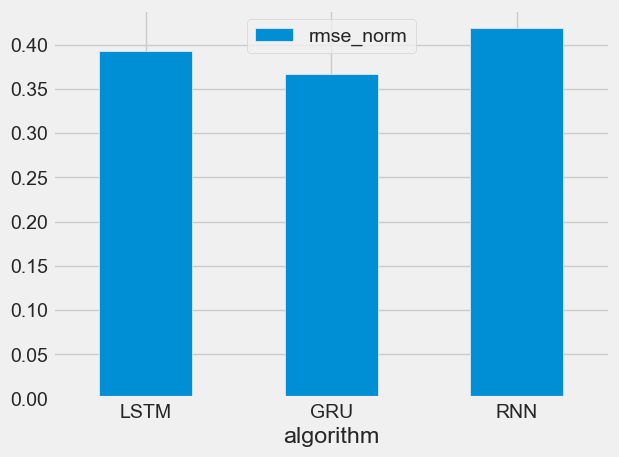

In [69]:
bar_asii_short = benchmark_asii_short.plot.bar(x='algorithm', y='rmse_norm', rot=0)

#### Long Term

In [70]:
benchmark_asii_long = benchmark_asii[benchmark_asii["term"] == "long"]
benchmark_asii_long

,Unnamed: 0,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
3,3,ASII,long,LSTM,197.575522,0.077621,50,50,rmsprop,32
4,4,ASII,long,GRU,167.372153,0.066025,50,50,sgd,150
5,5,ASII,long,RNN,163.072605,0.060709,50,50,adam,32


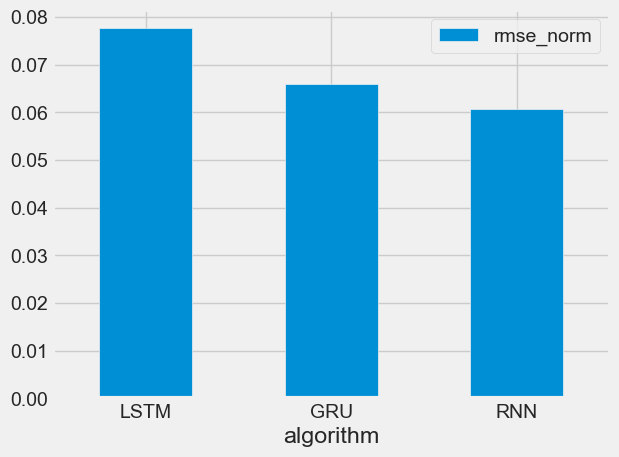

In [71]:
bar_asii_long = benchmark_asii_long.plot.bar(x='algorithm', y='rmse_norm', rot=0)

### GOTO

In [72]:
benchmark_goto = benchmark[benchmark["stock"] == "GOTO"]
benchmark_goto

,Unnamed: 0,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
6,6,GOTO,short,LSTM,2.348561,0.782854,50,50,rmsprop,32
7,7,GOTO,short,GRU,2.390132,0.778509,50,50,sgd,150
8,8,GOTO,short,RNN,2.221664,0.577393,50,50,adam,32
9,9,GOTO,long,LSTM,10.179642,0.130508,50,50,rmsprop,32
10,10,GOTO,long,GRU,7.381590,0.094636,50,50,sgd,150
11,11,GOTO,long,RNN,8.106996,0.080336,50,50,adam,32


#### Short Term

In [73]:
benchmark_goto_short = benchmark_goto[benchmark_goto["term"] == "short"]
benchmark_goto_short

,Unnamed: 0,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
6,6,GOTO,short,LSTM,2.348561,0.782854,50,50,rmsprop,32
7,7,GOTO,short,GRU,2.390132,0.778509,50,50,sgd,150
8,8,GOTO,short,RNN,2.221664,0.577393,50,50,adam,32


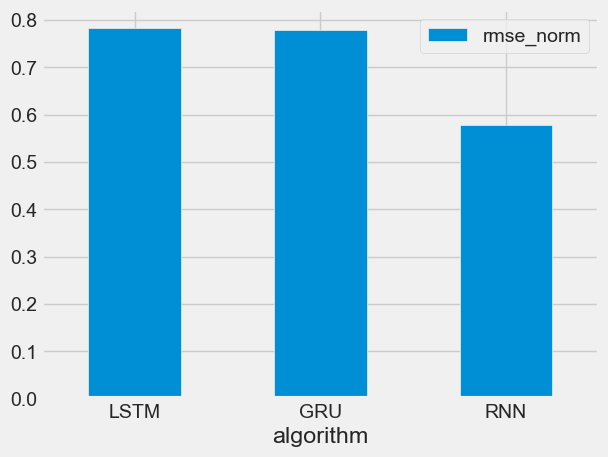

In [81]:
bar_goto_short = benchmark_goto_short.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)

#### Long Term

In [82]:
benchmark_goto_long = benchmark_goto[benchmark_goto["term"] == "long"]
benchmark_goto_long

,Unnamed: 0,stock,term,algorithm,rmse,rmse_norm,epoch,unit,optimizer,batch_size
9,9,GOTO,long,LSTM,10.179642,0.130508,50,50,rmsprop,32
10,10,GOTO,long,GRU,7.381590,0.094636,50,50,sgd,150
11,11,GOTO,long,RNN,8.106996,0.080336,50,50,adam,32


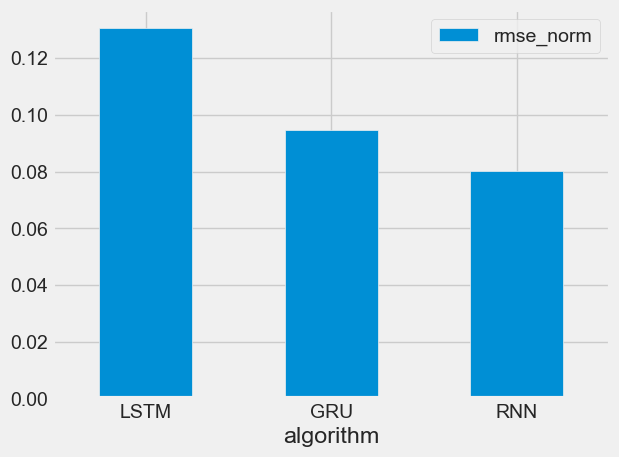

In [83]:
bar_goto_long = benchmark_goto_long.plot.bar(x='algorithm', y=['rmse_norm'], rot=0)